# **DS 4002 Project 2**
### Group Members: Evan Stewart, Balkees Rekik, Kyle Tran
---

### Description:
This project aims to perform an anomaly detectection on a parking ticket dataset issued by the City of Charlottesville between the years 1999 and 2025 in order to identify factors that influence the frequency of parking tickets issued at a given time.

## MI2 - Exploratory Data Analysis

#### 1.0 Importing and Cleaning Data

In [53]:
# importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json

In [54]:
# Getting data directly through download link
response = requests.get('https://hub.arcgis.com/api/v3/datasets/0ae373f4c2884abbb296500125bb9d8a_7/downloads/data?format=csv&spatialRefId=3857&where=1%3D1')

# reading the data into a csv file
if response.status_code == 200:
    with open('Parking_Tickets.csv', "wb") as file:
        for chunk in response.iter_content(chunk_size=1024):  # Download in chunks
            file.write(chunk)
        print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully.


In [55]:
# loading data into pandas dataframe
df = pd.read_csv('Parking_Tickets.csv')
print(df.shape)

<ipython-input-55-825c3e99e427>:2: DtypeWarning: Columns (1,4,5,7,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Parking_Tickets.csv')


(506311, 16)


In [56]:
# previewing top entries in data
df.head()

,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,WaiverRequestDate,WaiverGrantedDate,AppealDate,AppealGrantedDate,ViolationDescription,AppealStatus,Location,LicensePlateAnon,WaiverStatus
0,1,69692,2015/10/30 04:00:00+00,W WATER ST,9:58,100,NJ,NaN,NaN,NaN,NaN,Void,NaN,100 W WATER ST,23644,NaN
1,2,0880773,2022/01/27 05:00:00+00,14TH ST NW,09:35,22,MA,NaN,NaN,NaN,NaN,Curb Painted Yellow,NaN,22 14TH ST NW,11385,NaN
2,3,0881106,2022/07/27 04:00:00+00,5TH ST SW,12:21,100,VA,NaN,NaN,NaN,NaN,Void,NaN,100 5TH ST SW,118148,NaN
3,4,0881858,2022/10/13 04:00:00+00,JEFFERSON PARK AVE,11:00,1700,VA,NaN,NaN,NaN,NaN,No Parking any time,NaN,1700 JEFFERSON PARK AVE,142588,NaN
4,5,0888128,2021/06/29 04:00:00+00,1ST ST S,08:52,100,VA,NaN,NaN,NaN,NaN,Void,NaN,100 1ST ST S,119700,NaN


In [57]:
# checking for null entries
df.isna().sum()

,0
RecordID,0
TicketNumber,0
DateIssued,0
StreetName,5071
TimeIssued,26
StreetNumber,53264
LicenseState,0
WaiverRequestDate,505268
WaiverGrantedDate,505276
AppealDate,475041


In [58]:
# checking the data types of each column
df.dtypes

,0
RecordID,int64
TicketNumber,object
DateIssued,object
StreetName,object
TimeIssued,object
StreetNumber,object
LicenseState,object
WaiverRequestDate,object
WaiverGrantedDate,object
AppealDate,object


In [59]:
# removing whitespace and uppercasing string columns for consistent formatting
df = df.map(lambda x: x.upper().strip() if isinstance(x, str) else x)
# converting ticket numbers into numeric values
df['TicketNumber'] = pd.to_numeric(df['TicketNumber'], errors='coerce')

In [60]:
# listing the columns in the dataframe
df.columns

Index(['RecordID', 'TicketNumber', 'DateIssued', 'StreetName', 'TimeIssued',
       'StreetNumber', 'LicenseState', 'WaiverRequestDate',
       'WaiverGrantedDate', 'AppealDate', 'AppealGrantedDate',
       'ViolationDescription', 'AppealStatus', 'Location', 'LicensePlateAnon',
       'WaiverStatus'],
      dtype='object')

In [61]:
# cleaning data
df_cleaned = df.copy()
# dropping irrevelant columns
df_cleaned.drop(columns=['AppealDate', 'AppealStatus', 'AppealGrantedDate',
                 'WaiverRequestDate', 'WaiverGrantedDate', 'WaiverStatus'], inplace=True)

df_cleaned.head()

,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,ViolationDescription,Location,LicensePlateAnon
0,1,69692.0,2015/10/30 04:00:00+00,W WATER ST,9:58,100,NJ,VOID,100 W WATER ST,23644
1,2,880773.0,2022/01/27 05:00:00+00,14TH ST NW,09:35,22,MA,CURB PAINTED YELLOW,22 14TH ST NW,11385
2,3,881106.0,2022/07/27 04:00:00+00,5TH ST SW,12:21,100,VA,VOID,100 5TH ST SW,118148
3,4,881858.0,2022/10/13 04:00:00+00,JEFFERSON PARK AVE,11:00,1700,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,142588
4,5,888128.0,2021/06/29 04:00:00+00,1ST ST S,08:52,100,VA,VOID,100 1ST ST S,119700


In [62]:
# Remove NA Values
df_cleaned = df_cleaned.copy()
df_cleaned.dropna(subset=['StreetName', 'TimeIssued', 'LicenseState', 'StreetNumber'], inplace=True)
df_cleaned.isna().sum()

,0
RecordID,0
TicketNumber,7
DateIssued,0
StreetName,0
TimeIssued,0
StreetNumber,0
LicenseState,0
ViolationDescription,0
Location,0
LicensePlateAnon,0


In [63]:
# converting time colmuns into datetime object
df_cleaned = df_cleaned.copy()
df_cleaned['DateIssued'] = pd.to_datetime(df['DateIssued'], errors='coerce', utc=True)
df_cleaned['DateIssued'].describe()

,DateIssued
count,453013
mean,2010-04-07 10:58:33.307713024+00:00
min,1999-02-10 05:00:00+00:00
25%,2003-06-13 04:00:00+00:00
50%,2009-10-20 04:00:00+00:00
75%,2016-03-11 05:00:00+00:00
max,2208-11-08 05:00:00+00:00


In [64]:
# Cleaning the StreetName column
df_cleaned = df_cleaned.copy()
df_cleaned['StreetName'] = df_cleaned['StreetName'].str.upper()
df_cleaned['StreetName'] = df_cleaned['StreetName'].str.strip()
df_cleaned = df_cleaned[df_cleaned['DateIssued'].dt.year <= 2025]

import re

# Function to abbreviate street names
def abbreviate_street_name(street_name):
    if pd.isna(street_name):
        return street_name

    # Convert to lowercase for consistency
    street_name = street_name.lower()

    # Standardize ordinal numbers (e.g., "10th Street" -> "10 ST")
    street_name = re.sub(r'\b(\d+)th street\b', r'\1 st', street_name)

    # Handle "10 1/2 Street" and variations
    street_name = re.sub(r'\b(\d+)\s?1/2 street\b', r'\1 1/2 st', street_name)
    street_name = re.sub(r'\b(\d+)\s?&\s?half\b', r'\1 1/2 st', street_name)
    street_name = re.sub(r'\.', '', street_name)


    # Standardize common abbreviations
    replacements = {
        r'\b(\d+)(st|nd|rd|th)\b': r'\1',  # Remove ordinal suffixes
        r'\bstreet\b': 'ST',
        r'\bavenue\b': 'AVE',
        r'\bav\b': 'AVE',
        r'\bboulevard\b': 'BLVD',
        r'\broad\b': 'RD',
        r'\bdrive\b': 'DR',
        r'\bcourt\b': 'CT',
        r'\blane\b': 'LN',
        r'\bplace\b': 'PL',
        r'\bparkway\b': 'PKWY',
        r'\bterrace\b': 'TER',
        r'\bhighway\b': 'HWY',
        r'\bsquare\b': 'SQ',
        r'\bway\b': 'WAY',
        r'\bnortheast\b': 'NE',
        r'\bnorthwest\b': 'NW',
        r'\bsoutheast\b': 'SE',
        r'\bsouthwest\b': 'SW',
        r'\bnorth\b': 'N',
        r'\bsouth\b': 'S',
        r'\beast\b': 'E',
        r'\bwest\b': 'W'
    }


    for pattern, replacement in replacements.items():
        street_name = re.sub(pattern, replacement, street_name)

    # Standardize spacing and capitalization
    street_name =   street_name.upper().strip()

    street_name = re.sub(r'\bJPA\b', 'JEFFERSON PARK AVE', street_name)
    street_name = re.sub(r'\bJEFFERSON ST E\b', 'E JEFFERSON ST', street_name)
    street_name = re.sub(r'\bMARKET ST E\b', 'E MARKET ST', street_name)


    return street_name

# Apply cleaning function
df_cleaned["StreetName"] = df_cleaned["StreetName"].apply(abbreviate_street_name)

df_cleaned['StreetName'].value_counts()
df_cleaned.to_csv('cleaned_parking_tickets.csv', index=False)

In [65]:
from datetime import time

# defining clean_time function for extracting hour:minutes
def clean_time(time_str):
    time_format = str(time_str).strip()

    if ':' in time_format:
        time_format = time_format.zfill(5)
        time_format = time_format[:2] + time_format[3:]

    return time_format

# Cleaning TimeIssued column by making uniform formatting
df_cleaned = df_cleaned.copy()
df_cleaned['TimeIssued'] = df_cleaned['TimeIssued'].apply(clean_time)
df_cleaned['TimeIssued'] = pd.to_datetime(df_cleaned['TimeIssued'], format='%H%M', errors='coerce').dt.time
df_cleaned['TimeIssued'].describe()

,TimeIssued
count,387517
unique,1440
top,11:30:00
freq,1384


In [66]:
# Dropping the NA TimeIssued entries
df_cleaned = df_cleaned.copy()
df_cleaned.dropna(subset=['TimeIssued'], inplace=True)
df_cleaned.isna().sum()

,0
RecordID,0
TicketNumber,7
DateIssued,0
StreetName,0
TimeIssued,0
StreetNumber,0
LicenseState,0
ViolationDescription,0
Location,0
LicensePlateAnon,0


In [67]:
# cleaning LicenseState column by uniform formatting
df_cleaned = df_cleaned.copy()
df_cleaned['LicenseState'] = df_cleaned['LicenseState'].astype(str).str.upper().str.strip()
df_cleaned['LicenseState'].value_counts()

,count
LicenseState,
VA,336681
MD,5652
NC,4373
FL,3680
PA,3589
...,...
G,1
PE,1
FM,1


In [68]:
# cleaning the license state column with unique mapping
valid_states = {
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
}

df_cleaned = df_cleaned[df_cleaned['LicenseState'].isin(valid_states)]
df_cleaned['LicenseState'].value_counts()

,count
LicenseState,
VA,336681
MD,5652
NC,4373
FL,3680
PA,3589
NY,3522
NJ,2739
GA,2581
TX,2500


In [69]:
# Removing entries that have duplicate TicketNumber entries
df_cleaned = df_cleaned[~df['TicketNumber'].duplicated(keep=False)]
df_cleaned['TicketNumber'].value_counts()

<ipython-input-69-fa3195720ce8>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_cleaned[~df['TicketNumber'].duplicated(keep=False)]


,count
TicketNumber,
99999909.0,1
69692.0,1
880773.0,1
881106.0,1
881858.0,1
...,...
3343601.0,1
3343501.0,1
889503.0,1


In [70]:
# counting unique street names
df_cleaned['StreetName'].value_counts()

,count
StreetName,
WATER ST LOT,40281
E JEFFERSON ST,23119
UNIVERSITY AVE,21053
E MARKET ST,14600
JEFFERSON PARK AVE,13528
...,...
16 STNW,1
PALENTINE AVE,1
MARCHANT ST,1


In [71]:
# dropping entries with null street numbers
df_cleaned['StreetNumber'] = pd.to_numeric(df_cleaned['StreetNumber'], errors='coerce')
df_cleaned.dropna(subset=['StreetNumber'], inplace=True)
df_cleaned.isna().sum()

,0
RecordID,0
TicketNumber,0
DateIssued,0
StreetName,0
TimeIssued,0
StreetNumber,0
LicenseState,0
ViolationDescription,0
Location,0
LicensePlateAnon,0


In [72]:
# previewing cleaned dataframe
df_cleaned.head()

,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,ViolationDescription,Location,LicensePlateAnon
0,1,69692.0,2015-10-30 04:00:00+00:00,W WATER ST,09:58:00,100.0,NJ,VOID,100 W WATER ST,23644
1,2,880773.0,2022-01-27 05:00:00+00:00,14 ST NW,09:35:00,22.0,MA,CURB PAINTED YELLOW,22 14TH ST NW,11385
2,3,881106.0,2022-07-27 04:00:00+00:00,5 ST SW,12:21:00,100.0,VA,VOID,100 5TH ST SW,118148
3,4,881858.0,2022-10-13 04:00:00+00:00,JEFFERSON PARK AVE,11:00:00,1700.0,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,142588
4,5,888128.0,2021-06-29 04:00:00+00:00,1 ST S,08:52:00,100.0,VA,VOID,100 1ST ST S,119700


In [73]:
# saving cleaned dataframe to csv
df_cleaned.to_csv('cleaned_parking_tickets.csv', index=False)

#### 2.0 Exploratory Data Analysis

In [74]:
# Creating plot for ticket issued over time
df_cleaned = pd.read_csv('cleaned_parking_tickets.csv')
df_cleaned.sort_values(by='DateIssued', inplace=True)
df_cleaned.tail(5)


,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,ViolationDescription,Location,LicensePlateAnon
105285,107963,295698.0,2025-02-18 19:18:54+00:00,E JEFFERSON ST,14:18:00,400.0,VA,NO PARKING ANY TIME,400 E JEFFERSON ST,54142
105286,107964,295699.0,2025-02-20 16:14:38+00:00,OLD PRESTON AVE,11:14:00,100.0,VA,NO PARKING ANY TIME,100 OLD PRESTON AVE,111525
105287,107965,295700.0,2025-02-20 17:23:32+00:00,RIALTO ST,12:23:00,600.0,VA,LT SIDE TO CURB,600 RIALTO ST,113781
105288,107966,295701.0,2025-02-20 17:57:48+00:00,OBSERVATORY AVE,12:57:00,100.0,NH,12 INCHES FROM CURB,100 OBSERVATORY AVE,22014
105289,107967,295702.0,2025-02-20 20:17:11+00:00,OLD PRESTON AVE,15:17:00,100.0,VA,NO PARKING ANY TIME,100 OLD PRESTON AVE,42209


<ipython-input-75-d7b447ea6100>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tickets_per_month = df_cleaned.groupby(df_cleaned['DateIssued'].dt.to_period('M')).size()


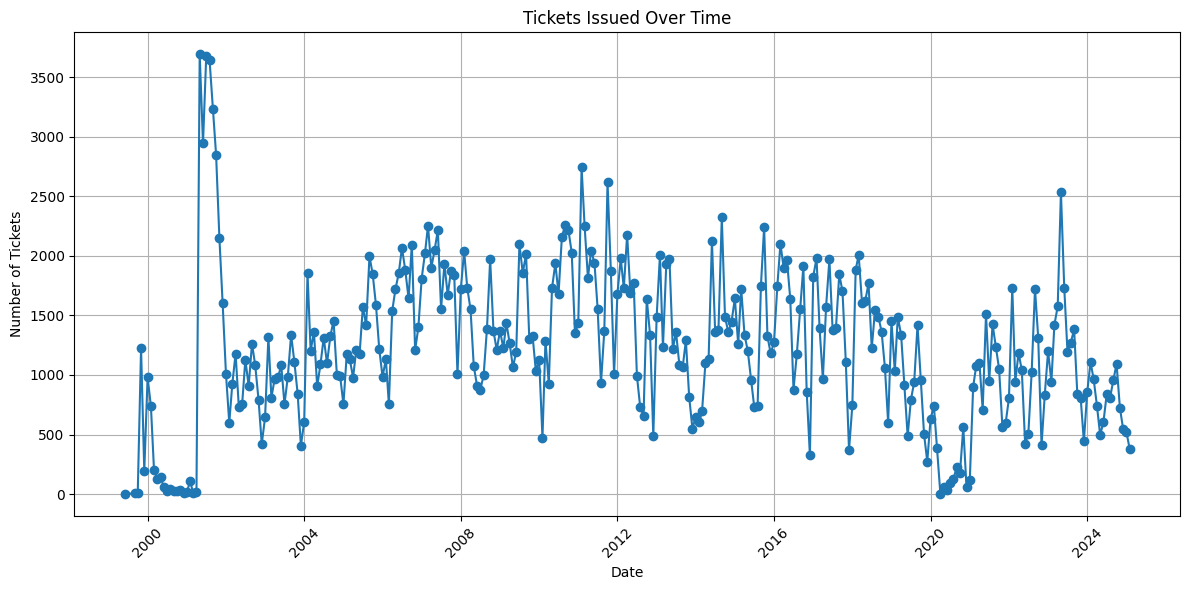

In [75]:
import matplotlib.pyplot as plt

# Plotting the number of parking tickets issued per month

df_cleaned = pd.read_csv('cleaned_parking_tickets.csv')
df_cleaned['DateIssued'] = pd.to_datetime(df_cleaned['DateIssued'])

# grouping tickets issued by month
tickets_per_month = df_cleaned.groupby(df_cleaned['DateIssued'].dt.to_period('M')).size()
tickets_per_month.index = tickets_per_month.index.to_timestamp()

# Making the line plot
plt.figure(figsize=(12, 6))
plt.plot(tickets_per_month.index, tickets_per_month.values, marker='o', linestyle='-')
plt.title('Tickets Issued Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

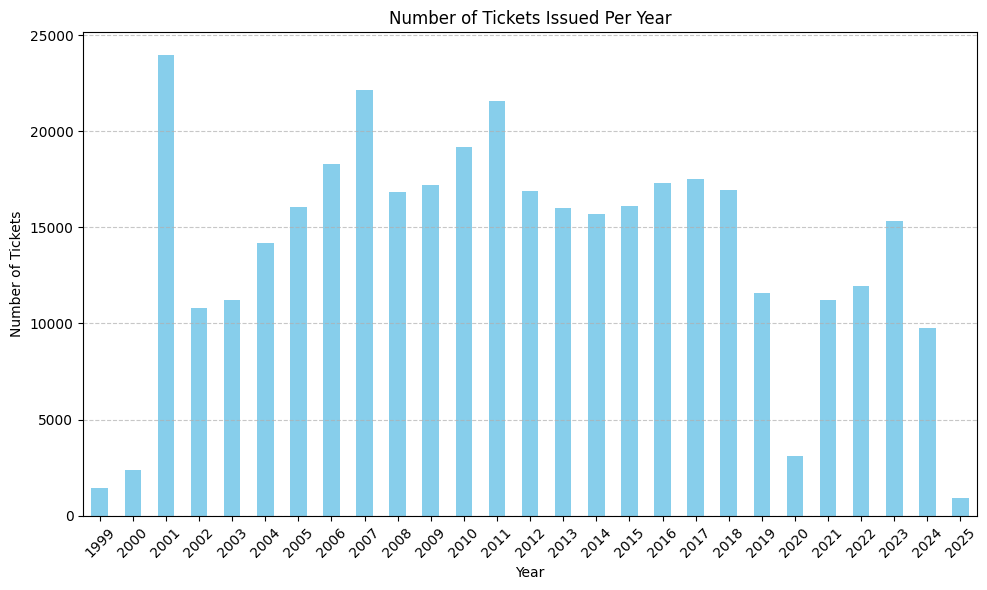

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

df_cleaned = pd.read_csv('cleaned_parking_tickets.csv')
df_cleaned['DateIssued'] = pd.to_datetime(df_cleaned['DateIssued'])

# Group by year and count the number of tickets
tickets_per_year = df_cleaned.groupby(df_cleaned['DateIssued'].dt.year).size()

# Plotting the number of tickets issued per year as a bar plot
plt.figure(figsize=(10, 6))
tickets_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Tickets Issued Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


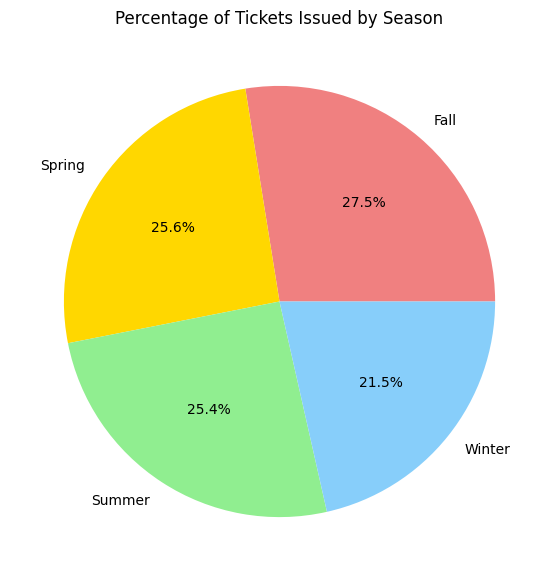

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data and ensure 'DateIssued' is in datetime format
df_cleaned = pd.read_csv('cleaned_parking_tickets.csv')
df_cleaned['DateIssued'] = pd.to_datetime(df_cleaned['DateIssued'])

# Define a function to categorize the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the 'DateIssued' column to create a new 'Season' column
df_cleaned['Season'] = df_cleaned['DateIssued'].dt.month.apply(get_season)

# Plotting the percentage of tickets issued in each season (Pie Chart)
season_counts = df_cleaned['Season'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightgreen', 'lightskyblue'])
plt.title('Percentage of Tickets Issued by Season')
plt.show()


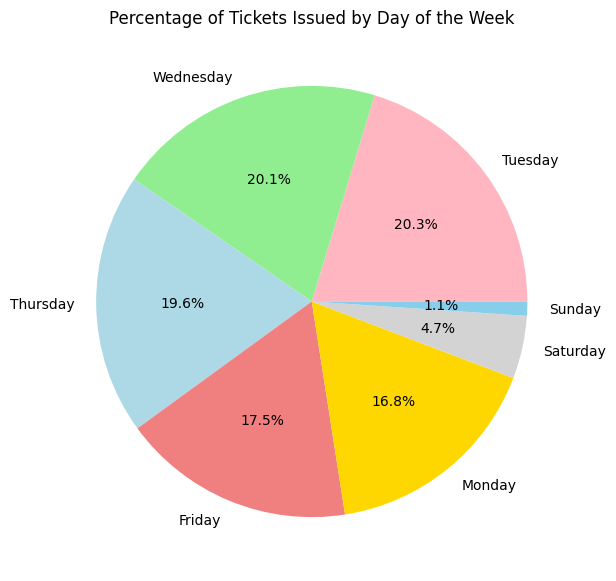

In [78]:
# Extract day of the week from 'DateIssued'
df_cleaned['DayOfWeek'] = df_cleaned['DateIssued'].dt.day_name()

# Plotting the percentage of tickets issued by day of the week (Pie Chart)
day_of_week_counts = df_cleaned['DayOfWeek'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', colors=['lightpink', 'lightgreen', 'lightblue', 'lightcoral', 'gold', 'lightgray', 'skyblue'])
plt.title('Percentage of Tickets Issued by Day of the Week')
plt.show()


<ipython-input-79-802caae452f5>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['TimeIssued'] = pd.to_datetime(df_cleaned['TimeIssued'])


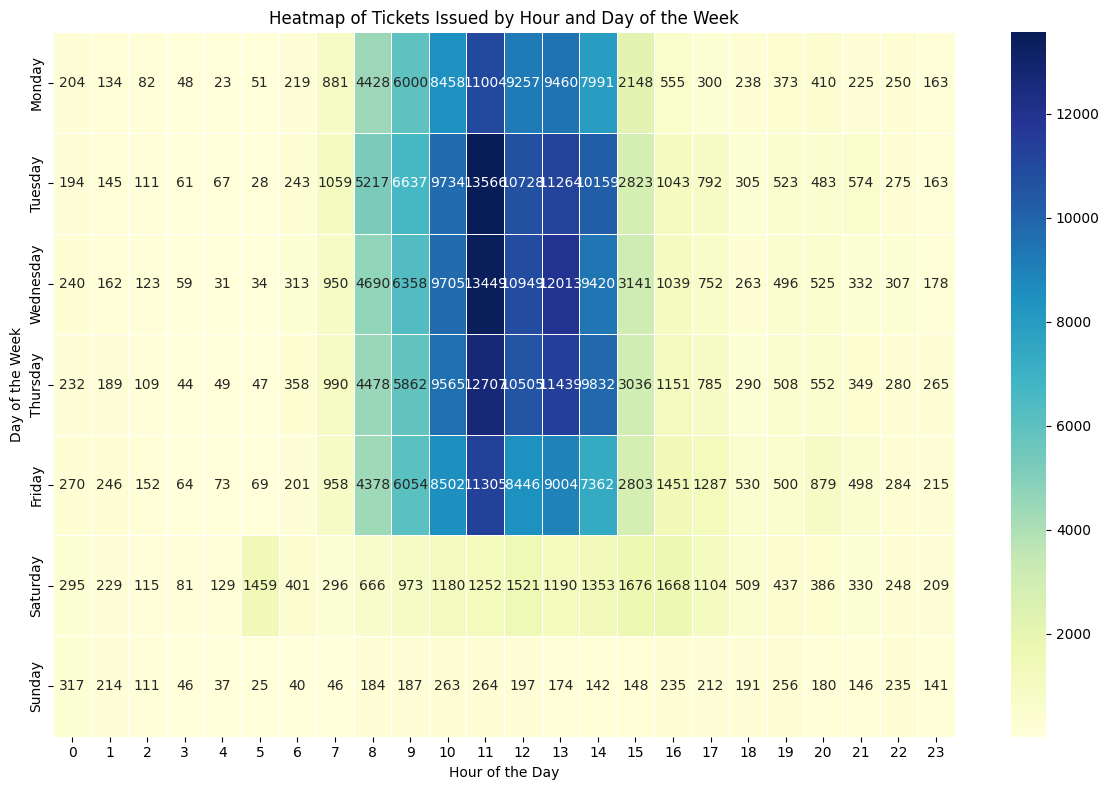

In [79]:
import seaborn as sns

df_cleaned = pd.read_csv('cleaned_parking_tickets.csv')
df_cleaned['DateIssued'] = pd.to_datetime(df_cleaned['DateIssued'])
df_cleaned['TimeIssued'] = pd.to_datetime(df_cleaned['TimeIssued'])

# Extract day of the week and hour
df_cleaned['DayOfWeek'] = df_cleaned['DateIssued'].dt.day_name()
df_cleaned['Hour'] = df_cleaned['TimeIssued'].dt.hour

# Create a pivot table for day of the week vs hour
heatmap_data = df_cleaned.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)

# Sort the days of the week in order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.loc[ordered_days]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('Heatmap of Tickets Issued by Hour and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


In [80]:
!pip install opencage

In [82]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from opencage.geocoder import OpenCageGeocode
import re
import time
from google.colab import userdata

# Replace with your actual API key
API_KEY = userdata.get('GEOCODE_API_KEY')
geocoder = OpenCageGeocode(API_KEY)

# Extracting street names
street_counts = df_cleaned['StreetName'].value_counts().reset_index()
street_counts.columns = ['StreetName', 'Count']

# Geocode streets
heat_data = []

# Creating lat/long for each street name
for _, row in street_counts.iterrows():
    street = row['StreetName']
    address = f"{street}, Charlottesville, VA"
    result = geocoder.geocode(address)
    if result and len(result):
        lat = result[0]['geometry']['lat']
        lon = result[0]['geometry']['lng']
        print(f"✅ {street} → ({lat}, {lon})")
        # Append coordinates weighted by citation_count for heatmap intensity
        heat_data.append([lat, lon, row['Count']])
    else:
        print(f"❌ Could not geocode: {street}")
    time.sleep(1)  # API rate limiting

# Create folium map explicitly centered on Charlottesville
m = folium.Map(location=[38.0293, -78.4767], zoom_start=14)

# Add HeatMap layer
HeatMap(heat_data, radius=15, blur=15, max_zoom=17).add_to(m)

# Save the interactive map
m.save('cville_citation_heatmap.html')
print("Map saved to cville_citation_heatmap.html")

✅ WATER ST LOT → (38.0269886, -78.472033)
✅ E JEFFERSON ST → (38.0285059, -78.4690364)
✅ UNIVERSITY AVE → (38.0352028, -78.5008453)
✅ E MARKET ST → (38.0279585, -78.4713226)
✅ JEFFERSON PARK AVE → (38.0276161, -78.5137405)
✅ 13 ST NW → (38.05176, -78.466126)
✅ GARRETT ST → (38.0287866, -78.4828689)
✅ 4 ST NE → (38.052126, -78.466758)
✅ 7 ST NE → (38.051758, -78.466123)
✅ 15 ST NW → (38.05176, -78.466127)
✅ 3 ST NE → (38.051757, -78.46612)
✅ BRANDON AVE → (38.0304323, -78.5042508)
✅ 1 ST N → (38.051826, -78.46609)
✅ 12 1/2 ST NW → (38.0337833, -78.4973392)
✅ W MAIN ST → (38.0313503, -78.4894048)
✅ WERTLAND ST → (38.03423, -78.4956342)
✅ 2 ST NE → (38.052057, -78.466788)
✅ UNIVERSITY CIR → (38.0436037, -78.5035461)
✅ 4 ST SE → (38.05028, -78.988415)
✅ 2 ST NW → (38.052057, -78.466788)
✅ MAIN ST W → (38.030773, -78.481507)
✅ 8 ST NE → (38.052125, -78.466756)
✅ 14 ST NW → (38.052123, -78.466752)
✅ 2 ST SW → (38.09165, -78.864877)
✅ 1 ST S → (38.050353, -78.988464)
✅ GRADY AVE → (38.0394122

## MI3 - Analysis with Machine Learning Models

#### 1.0 Data Preparation / Feature Engineering

In [31]:
df_cleaned = pd.read_csv('cleaned_parking_tickets.csv')

# Feature Enigneering the Time/Date Tickets Issued
df_cleaned['DateIssued'] = pd.to_datetime(df_cleaned['DateIssued'])
df_cleaned['Hour'] = pd.to_datetime(df_cleaned['TimeIssued']).dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['DateIssued'].dt.day_name()
df_cleaned['Month'] = df_cleaned['DateIssued'].dt.month
df_cleaned['Year'] = df_cleaned['DateIssued'].dt.year

# Adding a feature for season ticket issued
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_cleaned['Season'] = df_cleaned['DateIssued'].dt.month.apply(get_season)

# Adding a feature for time of day ticket issued
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df_cleaned['TimeOfDay'] = df_cleaned['Hour'].apply(get_time_of_day)

# Removing unneeded features
df_cleaned.drop(columns=['DateIssued','TimeIssued','LicensePlateAnon', 'TicketNumber'], inplace=True)

df_cleaned.head()

<ipython-input-31-4bbc464ed120>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Hour'] = pd.to_datetime(df_cleaned['TimeIssued']).dt.hour


,RecordID,StreetName,StreetNumber,LicenseState,ViolationDescription,Location,Hour,DayOfWeek,Month,Year,Season,TimeOfDay
0,1,W WATER ST,100.0,NJ,VOID,100 W WATER ST,9,Friday,10,2015,Fall,Morning
1,2,14 ST NW,22.0,MA,CURB PAINTED YELLOW,22 14TH ST NW,9,Thursday,1,2022,Winter,Morning
2,3,5 ST SW,100.0,VA,VOID,100 5TH ST SW,12,Wednesday,7,2022,Summer,Afternoon
3,4,JEFFERSON PARK AVE,1700.0,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,11,Thursday,10,2022,Fall,Morning
4,5,1 ST S,100.0,VA,VOID,100 1ST ST S,8,Tuesday,6,2021,Summer,Morning


In [32]:
# Listing the data type of each column
df_cleaned.dtypes

,0
RecordID,int64
StreetName,object
StreetNumber,float64
LicenseState,object
ViolationDescription,object
Location,object
Hour,int32
DayOfWeek,object
Month,int32
Year,int32


In [33]:
# Performing Encoding for Categorical Variables
import numpy as np


# attempting sin/cos encoding for date features
# https://harrisonpim.com/blog/the-best-way-to-encode-dates-times-and-other-cyclical-features

day_map = {
    "Monday":0,
    "Tuesday":1,
    "Wednesday":2,
    "Thursday":3,
    "Friday":4,
    "Saturday":5,
    "Sunday":6
}

df_cleaned['DayOfWeekNum'] = df_cleaned['DayOfWeek'].map(day_map)

# Performming sin/cos encoding for Day of Week Feature
df_cleaned['day_num'] = np.sin(2 * np.pi * df_cleaned['DayOfWeekNum'] / 7)
df_cleaned['day_cos'] = np.cos(2 * np.pi * df_cleaned['DayOfWeekNum'] / 7)
df_cleaned.drop(columns=['DayOfWeekNum', 'DayOfWeek'], inplace=True)
df_cleaned.head()

,RecordID,StreetName,StreetNumber,LicenseState,ViolationDescription,Location,Hour,Month,Year,Season,TimeOfDay,day_num,day_cos
0,1,W WATER ST,100.0,NJ,VOID,100 W WATER ST,9,10,2015,Fall,Morning,-0.433884,-0.900969
1,2,14 ST NW,22.0,MA,CURB PAINTED YELLOW,22 14TH ST NW,9,1,2022,Winter,Morning,0.433884,-0.900969
2,3,5 ST SW,100.0,VA,VOID,100 5TH ST SW,12,7,2022,Summer,Afternoon,0.974928,-0.222521
3,4,JEFFERSON PARK AVE,1700.0,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,11,10,2022,Fall,Morning,0.433884,-0.900969
4,5,1 ST S,100.0,VA,VOID,100 1ST ST S,8,6,2021,Summer,Morning,0.781831,0.623490


In [34]:
# sin/cos encoding for Season

season_map = {
    "Winter":0,
    "Spring":1,
    "Summer":2,
    "Fall":3
}

# Creating sin/cos encoding for Season Feature
df_cleaned['SeasonNum'] = df_cleaned['Season'].map(season_map)
df_cleaned['season_num'] = np.sin(2 * np.pi * df_cleaned['SeasonNum'] / 4)
df_cleaned['season_cos'] = np.cos(2 * np.pi * df_cleaned['SeasonNum'] / 4)
df_cleaned.drop(columns=['SeasonNum', 'Season'], inplace=True)
df_cleaned.head()

,RecordID,StreetName,StreetNumber,LicenseState,ViolationDescription,Location,Hour,Month,Year,TimeOfDay,day_num,day_cos,season_num,season_cos
0,1,W WATER ST,100.0,NJ,VOID,100 W WATER ST,9,10,2015,Morning,-0.433884,-0.900969,-1.000000e+00,-1.836970e-16
1,2,14 ST NW,22.0,MA,CURB PAINTED YELLOW,22 14TH ST NW,9,1,2022,Morning,0.433884,-0.900969,0.000000e+00,1.000000e+00
2,3,5 ST SW,100.0,VA,VOID,100 5TH ST SW,12,7,2022,Afternoon,0.974928,-0.222521,1.224647e-16,-1.000000e+00
3,4,JEFFERSON PARK AVE,1700.0,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,11,10,2022,Morning,0.433884,-0.900969,-1.000000e+00,-1.836970e-16
4,5,1 ST S,100.0,VA,VOID,100 1ST ST S,8,6,2021,Morning,0.781831,0.623490,1.224647e-16,-1.000000e+00


In [35]:
# sin/cos encoding for Time Of Day

time_map = {
    "Morning":0,
    "Afternoon":1,
    "Evening":2
}

# sin/cos encoding for Time of Day feature
df_cleaned['TimeOfDayNum'] = df_cleaned['TimeOfDay'].map(time_map)
df_cleaned['time_num'] = np.sin(2 * np.pi * df_cleaned['TimeOfDayNum'] / 3)
df_cleaned['time_cos'] = np.cos(2 * np.pi * df_cleaned['TimeOfDayNum'] / 3)
df_cleaned.drop(columns=['TimeOfDayNum', 'TimeOfDay'], inplace=True)
df_cleaned.head()

,RecordID,StreetName,StreetNumber,LicenseState,ViolationDescription,Location,Hour,Month,Year,day_num,day_cos,season_num,season_cos,time_num,time_cos
0,1,W WATER ST,100.0,NJ,VOID,100 W WATER ST,9,10,2015,-0.433884,-0.900969,-1.000000e+00,-1.836970e-16,0.000000,1.0
1,2,14 ST NW,22.0,MA,CURB PAINTED YELLOW,22 14TH ST NW,9,1,2022,0.433884,-0.900969,0.000000e+00,1.000000e+00,0.000000,1.0
2,3,5 ST SW,100.0,VA,VOID,100 5TH ST SW,12,7,2022,0.974928,-0.222521,1.224647e-16,-1.000000e+00,0.866025,-0.5
3,4,JEFFERSON PARK AVE,1700.0,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,11,10,2022,0.433884,-0.900969,-1.000000e+00,-1.836970e-16,0.000000,1.0
4,5,1 ST S,100.0,VA,VOID,100 1ST ST S,8,6,2021,0.781831,0.623490,1.224647e-16,-1.000000e+00,0.000000,1.0


In [36]:
# frequency encoding for LicenseState, Location, StreetName, ViolationDescription

# frequency encoding for LicenseState Feature
license_state_counts = df_cleaned['LicenseState'].value_counts()
df_cleaned['LicenseStateFreq'] = df_cleaned['LicenseState'].map(license_state_counts)

# frequency encoding for Location Feature
location_counts = df_cleaned['Location'].value_counts()
df_cleaned['LocationFreq'] = df_cleaned['Location'].map(location_counts)

# frequency encoding for StreetName Feature
street_counts = df_cleaned['StreetName'].value_counts()
df_cleaned['StreetNameFreq'] = df_cleaned['StreetName'].map(street_counts)

# frequency encoding for ViolationDescription Feature
violation_counts = df_cleaned['ViolationDescription'].value_counts()
df_cleaned['ViolationDescriptionFreq'] = df_cleaned['ViolationDescription'].map(violation_counts)

df_cleaned.drop(columns=['LicenseState', 'Location', 'StreetName', 'ViolationDescription'], inplace=True)
df_cleaned.head()

,RecordID,StreetNumber,Hour,Month,Year,day_num,day_cos,season_num,season_cos,time_num,time_cos,LicenseStateFreq,LocationFreq,StreetNameFreq,ViolationDescriptionFreq
0,1,100.0,9,10,2015,-0.433884,-0.900969,-1.000000e+00,-1.836970e-16,0.000000,1.0,2691,1288,2547,7783
1,2,22.0,9,1,2022,0.433884,-0.900969,0.000000e+00,1.000000e+00,0.000000,1.0,1861,1,4077,13060
2,3,100.0,12,7,2022,0.974928,-0.222521,1.224647e-16,-1.000000e+00,0.866025,-0.5,326910,16,156,7783
3,4,1700.0,11,10,2022,0.433884,-0.900969,-1.000000e+00,-1.836970e-16,0.000000,1.0,326910,1757,13377,41988
4,5,100.0,8,6,2021,0.781831,0.623490,1.224647e-16,-1.000000e+00,0.000000,1.0,326910,354,3888,7783


In [37]:
# Making sure StreetNumber feature is a integer type + No NA entries in dataframe
df_cleaned['StreetNumber'] = df_cleaned['StreetNumber'].astype(int)
df_cleaned.isna().sum()

,0
RecordID,0
StreetNumber,0
Hour,0
Month,0
Year,0
day_num,0
day_cos,0
season_num,0
season_cos,0
time_num,0


#### 2.0 Isolation Forest Model

In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

# Parameters
n_estimators = 100  # Number of trees
contamination = 0.05  # Expected proportion of anomalies
sample_size = 256  # Number of samples used to train each tree

# establishing model
iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, random_state=42)

In [39]:
# training model with data
iso_forest.fit(df_cleaned)

IsolationForest(contamination=0.05, random_state=42)

100%|===================| 9962/10000 [02:30<00:00]       

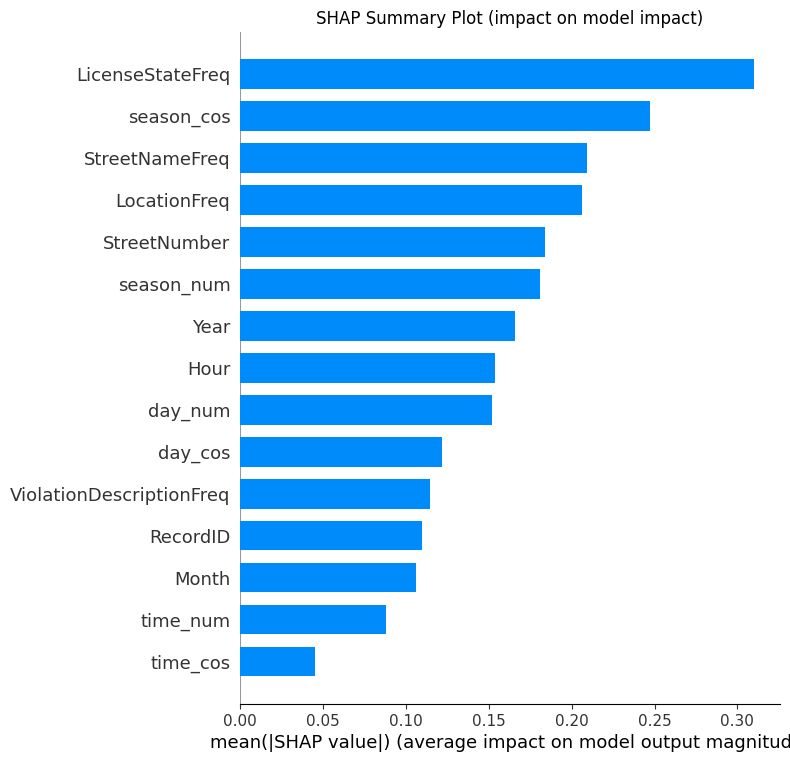

In [40]:
import shap

# calculating SHAP values to estimate the feature importance of model
explainer = shap.Explainer(iso_forest, df_cleaned)
data_sample = df_cleaned.sample(n=10000, random_state=42)
shap_values = explainer(data_sample)

# creating bar plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, data_sample, plot_type="bar", show=False)
plt.title("SHAP Summary Plot (impact on model impact)")
plt.show()

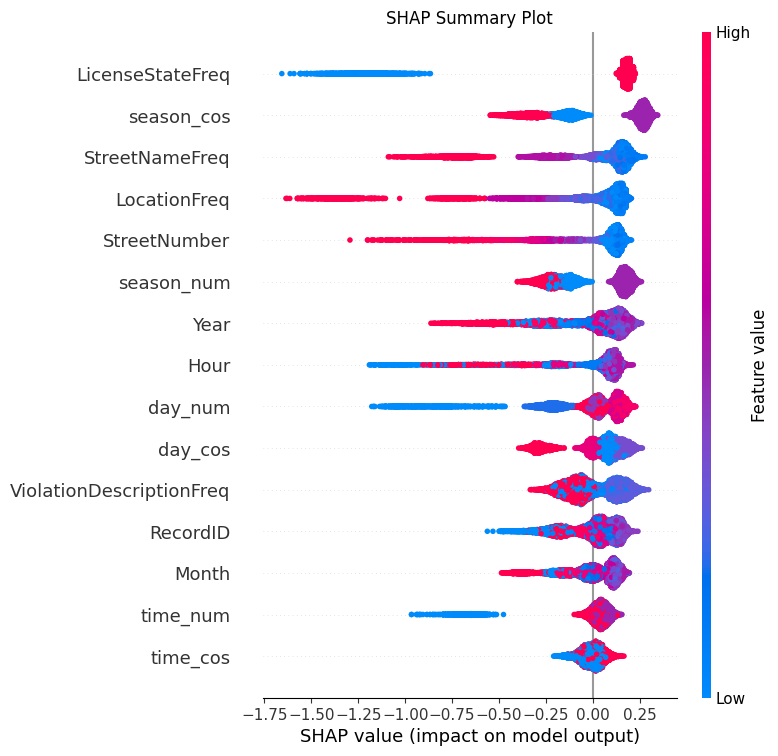

In [41]:
# creating beeswarm plot of SHAP values
shap.summary_plot(shap_values, data_sample, show=False)
plt.title("SHAP Summary Plot")
plt.show()

In [42]:
# assigning anomaly scores/values based on the model
data = df_cleaned.loc[df_cleaned.index].copy()
data['anomaly_label'] = iso_forest.predict(df_cleaned)
data['anomaly_score'] = iso_forest.decision_function(df_cleaned)

data['anomaly_label'].value_counts()

,count
anomaly_label,
1,356702
-1,18774


In [43]:
# extracting entries in data that are labeled as an anomaly
anomalies = data[data['anomaly_label'] == -1]
anomalies.head()

,RecordID,StreetNumber,Hour,Month,Year,day_num,day_cos,season_num,season_cos,time_num,time_cos,LicenseStateFreq,LocationFreq,StreetNameFreq,ViolationDescriptionFreq,anomaly_label,anomaly_score
6,7,1609,10,10,2022,0.000000,1.000000,-1.000000e+00,-1.836970e-16,0.000000,1.0,4271,11,20523,147632,-1,-0.031634
11,15,1411,1,3,2013,-0.433884,-0.900969,1.000000e+00,6.123234e-17,-0.866025,-0.5,326910,700,20523,2543,-1,-0.030863
12,16,0,17,10,2011,-0.974928,-0.222521,-1.000000e+00,-1.836970e-16,-0.866025,-0.5,1406,6,39831,38035,-1,-0.047282
25,29,200,20,8,2015,0.433884,-0.900969,1.224647e-16,-1.000000e+00,-0.866025,-0.5,2691,341,8399,7783,-1,-0.007280
26,30,1541,19,8,2015,-0.974928,-0.222521,1.224647e-16,-1.000000e+00,-0.866025,-0.5,232,4,1482,7783,-1,-0.053061


In [44]:
# getting basic statistics on the anomaly_score column
data['anomaly_score'].describe()

,anomaly_score
count,375476.000000
mean,0.066586
std,0.035737
min,-0.099306
25%,0.042676
50%,0.074756
75%,0.094026
max,0.138638


In [45]:
# Counting the number of entries per month for the anomalies dataframe
anomalies['Month'].value_counts()

,count
Month,
12,2431
1,1915
2,1913
10,1878
11,1762
9,1433
8,1400
3,1315
6,1299


<ipython-input-46-742fa8085402>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['date'] = pd.to_datetime(anomalies[['Month', 'Year']].assign(day=1))
<ipython-input-46-742fa8085402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_tickets['date'] = pd.to_datetime(normal_tickets[['Month', 'Year']].assign(day=1))


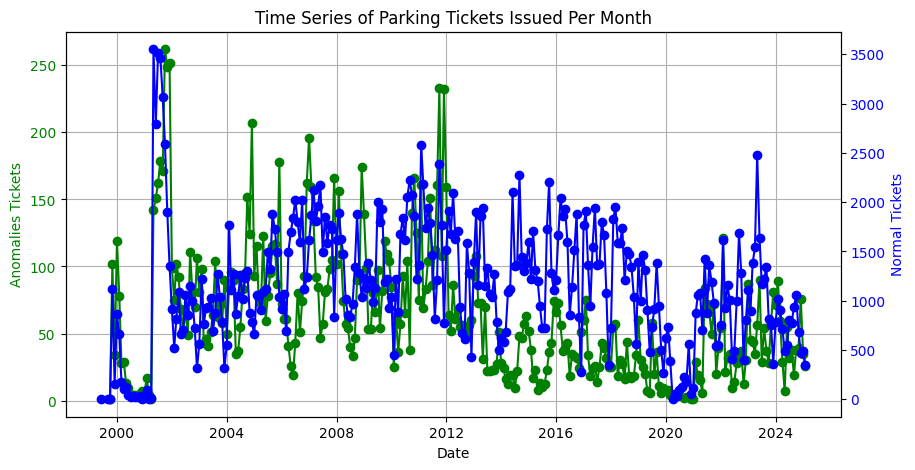

In [46]:
import matplotlib.pyplot as plt

# Plotting the number of parking tickets issued per month

anomalies['date'] = pd.to_datetime(anomalies[['Month', 'Year']].assign(day=1))
normal_tickets = data[data['anomaly_label'] == 1]
normal_tickets['date'] = pd.to_datetime(normal_tickets[['Month', 'Year']].assign(day=1))

# Count tickets per month
tickets_per_month_anomalies = anomalies.groupby("date").size()
tickets_per_month_normal = normal_tickets.groupby("date").size()

# Plot time series
fig, ax1 = plt.subplots(figsize=(10, 5))
# Plotting the first line (anomalies) on the first Y-axis
ax1.plot(tickets_per_month_anomalies.index, tickets_per_month_anomalies.values, marker='o', linestyle='-', color='g')
ax1.set_xlabel("Date")
ax1.set_ylabel("Anomalies Tickets", color='g')
ax1.tick_params(axis='y', labelcolor='g')

# Creating a secondary Y-axis for the normal tickets
ax2 = ax1.twinx()
ax2.plot(tickets_per_month_normal.index, tickets_per_month_normal.values, marker='o', linestyle='-', color='b')
ax2.set_ylabel("Normal Tickets", color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Adding title and grid
plt.title("Time Series of Parking Tickets Issued Per Month")
ax1.grid(True)

plt.show()

In [47]:
# Creating new dataframe from cleaned data before feature engineering
df_cleaned_original = pd.read_csv('cleaned_parking_tickets.csv')
df_cleaned_original['DateIssued'] = pd.to_datetime(df_cleaned_original['DateIssued'])
df_cleaned_original.head()

,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,ViolationDescription,Location,LicensePlateAnon
0,1,69692.0,2015-10-30 04:00:00+00:00,W WATER ST,09:58:00,100.0,NJ,VOID,100 W WATER ST,23644
1,2,880773.0,2022-01-27 05:00:00+00:00,14 ST NW,09:35:00,22.0,MA,CURB PAINTED YELLOW,22 14TH ST NW,11385
2,3,881106.0,2022-07-27 04:00:00+00:00,5 ST SW,12:21:00,100.0,VA,VOID,100 5TH ST SW,118148
3,4,881858.0,2022-10-13 04:00:00+00:00,JEFFERSON PARK AVE,11:00:00,1700.0,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,142588
4,5,888128.0,2021-06-29 04:00:00+00:00,1 ST S,08:52:00,100.0,VA,VOID,100 1ST ST S,119700


In [48]:
# Adding anomaly_label back to original dataset (without feature engineering)
df_cleaned_original['anomaly_label'] = data['anomaly_label']
df_cleaned_original['Year'] = df_cleaned_original['DateIssued'].dt.year
df_cleaned_original.head()

,RecordID,TicketNumber,DateIssued,StreetName,TimeIssued,StreetNumber,LicenseState,ViolationDescription,Location,LicensePlateAnon,anomaly_label,Year
0,1,69692.0,2015-10-30 04:00:00+00:00,W WATER ST,09:58:00,100.0,NJ,VOID,100 W WATER ST,23644,1,2015
1,2,880773.0,2022-01-27 05:00:00+00:00,14 ST NW,09:35:00,22.0,MA,CURB PAINTED YELLOW,22 14TH ST NW,11385,1,2022
2,3,881106.0,2022-07-27 04:00:00+00:00,5 ST SW,12:21:00,100.0,VA,VOID,100 5TH ST SW,118148,1,2022
3,4,881858.0,2022-10-13 04:00:00+00:00,JEFFERSON PARK AVE,11:00:00,1700.0,VA,NO PARKING ANY TIME,1700 JEFFERSON PARK AVE,142588,1,2022
4,5,888128.0,2021-06-29 04:00:00+00:00,1 ST S,08:52:00,100.0,VA,VOID,100 1ST ST S,119700,1,2021


In [49]:
# separating normal and anomaly tickets into 2 different dataframes
normal_tickets = df_cleaned_original[df_cleaned_original['anomaly_label'] == 1]
anomaly_tickets = df_cleaned_original[df_cleaned_original['anomaly_label'] == -1]

In [50]:
from scipy.stats import ttest_ind

df_cleaned_original['Year'] = df_cleaned_original['DateIssued'].dt.year

# groupping tickets by years
tickets_per_year = df_cleaned_original.groupby('Year').size()
normal_tickets_per_year = normal_tickets.groupby('Year').size()
anomaly_tickets_per_year = anomaly_tickets.groupby('Year').size()

# calculating ticket issuance rate of normal and anomaly tickets
normal_rate = normal_tickets_per_year / len(normal_tickets_per_year) if len(normal_tickets_per_year) > 0 else 0
anomaly_rate = anomaly_tickets_per_year / len(anomaly_tickets_per_year) if len(anomaly_tickets_per_year) > 0 else 0

t_stat, p_value = ttest_ind(normal_rate, anomaly_rate)

# performing t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 11.127917547455516
P-value: 2.2819261368663706e-15


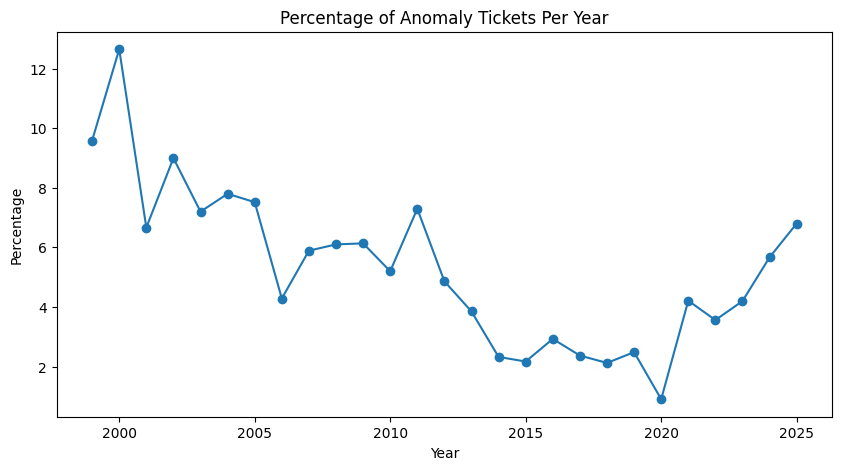

In [51]:
# Plotting the percentage of anomaly tickets issued per year over time
anomaly_percentage = (anomaly_tickets_per_year / tickets_per_year) * 100
plt.figure(figsize=(10, 5))
plt.title("Percentage of Anomaly Tickets Per Year")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.plot(anomaly_percentage.index, anomaly_percentage.values, marker='o', linestyle='-')

In [52]:
# Saving the trained_data to a csv
data.to_csv('trained_data.csv', index=False)